In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vanilla = pd.read_csv("results_vanilla.csv")
cot = pd.read_csv("results_cot.csv")
cp = pd.read_csv("cp_0.1_0.9241418242454528.csv")
cp_2 = pd.read_csv("cp_0.05_0.9465966708958148.csv")
cp_3 = pd.read_csv("cp_0.01_0.9975273767486216.csv")
cp_4 = pd.read_csv("cp_0.2_0.7310585975646973.csv")

In [3]:
vanilla["correct"] = vanilla["prediction"] == vanilla["answer"]
cot["correct"] = cot["prediction"] == cot["answer"]
cp["correct"] = cp["prediction"] == cp["answer"]
cp_2["correct"] = cp_2["prediction"] == cp_2["answer"]
cp_3["correct"] = cp_3["prediction"] == cp_3["answer"]
cp_4["correct"] = cp_4["prediction"] == cp_4["answer"]

In [4]:
vanilla["correct"].sum() / vanilla.shape[0], cot["correct"].sum() / vanilla.shape[0], cp["correct"].sum() / vanilla.shape[0], cp_2["correct"].sum() / vanilla.shape[0], cp_3["correct"].sum() / vanilla.shape[0], cp_4["correct"].sum() / vanilla.shape[0]

(0.7473333333333333,
 0.8986666666666666,
 0.8686666666666667,
 0.8786666666666667,
 0.8953333333333333,
 0.8206666666666667)

In [5]:
(69/1)*100

6900.0

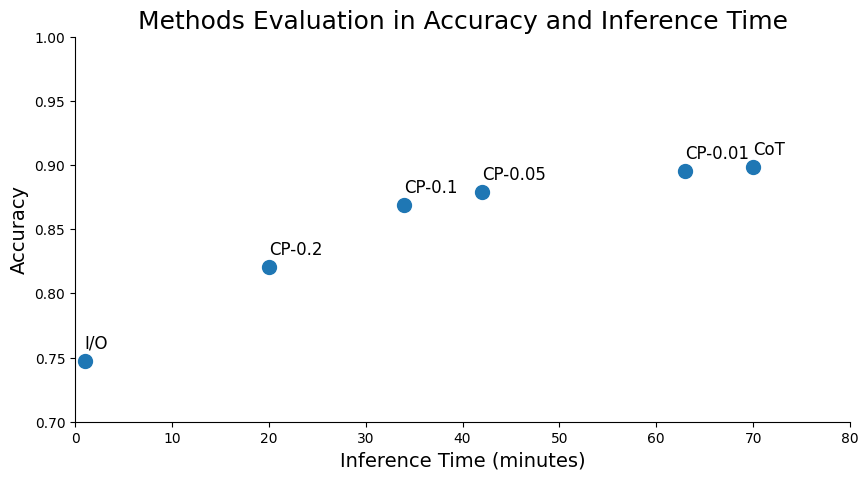

In [10]:
accuracies = np.array([vanilla["correct"].sum() / vanilla.shape[0], cot["correct"].sum() / vanilla.shape[0], cp["correct"].sum() / vanilla.shape[0], cp_2["correct"].sum() / vanilla.shape[0], cp_3["correct"].sum() / vanilla.shape[0], cp_4["correct"].sum() / vanilla.shape[0]])
names = ["I/O", "CoT", "CP-0.1", "CP-0.05", "CP-0.01", "CP-0.2"]
inference_time = [1, 70, 34, 42, 63, 20]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(inference_time, accuracies, s=100)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_xlabel("Inference Time (minutes)", fontsize=14)
ax.set_title("Methods Evaluation in Accuracy and Inference Time", fontsize=18)
ax.set_xlim(0, 80)
ax.set_ylim(0.7, 1)
ax.spines[['right', 'top']].set_visible(False)

for i, txt in enumerate(names):
    ax.annotate(txt, (inference_time[i], accuracies[i]+0.01), size=12)

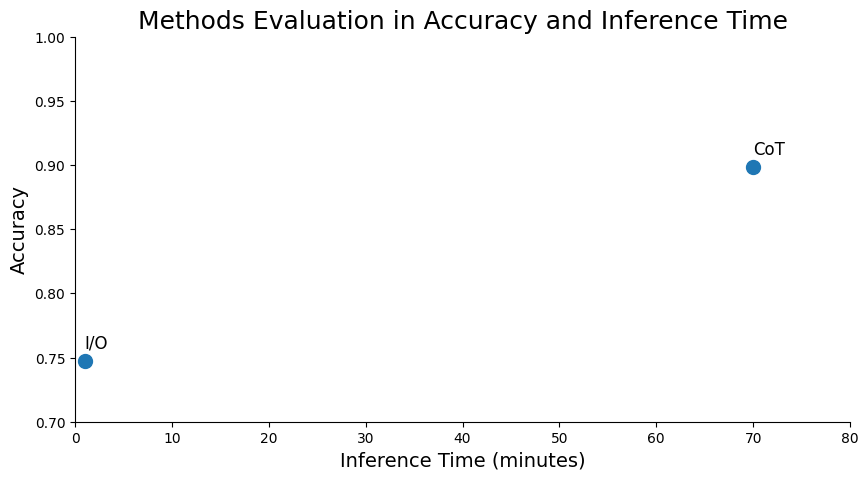

In [6]:
accuracies = np.array([vanilla["correct"].sum() / vanilla.shape[0], cot["correct"].sum() / vanilla.shape[0]])
names = ["I/O", "CoT"]
inference_time = [1, 70]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(inference_time, accuracies, s=100)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_xlabel("Inference Time (minutes)", fontsize=14)
ax.set_title("Methods Evaluation in Accuracy and Inference Time", fontsize=18)
ax.set_xlim(0, 80)
ax.set_ylim(0.7, 1)
ax.spines[['right', 'top']].set_visible(False)

for i, txt in enumerate(names):
    ax.annotate(txt, (inference_time[i], accuracies[i]+0.01), size=12)

In [7]:
alphas = np.array([0.2, 0.1, 0.05, 0.01])
conformal_scores = pd.read_csv("calibrating_scores.csv")
conformal_scores_cot = pd.read_csv("conformal_scores_cot.csv")

n = conformal_scores.shape[0]
q_level = np.ceil((n+1)*(1-alphas))/n
qhat = np.quantile(conformal_scores["calibrating_scores"].to_numpy(), q_level, method='higher')

In [9]:
conformal_scores_cot

,conformal_scores
0,0.000040
1,0.000001
2,0.000028
3,0.000028
4,0.000017
...,...
495,0.000011
496,0.000011
497,0.000013
498,0.000001


In [12]:
qhat = 1-qhat

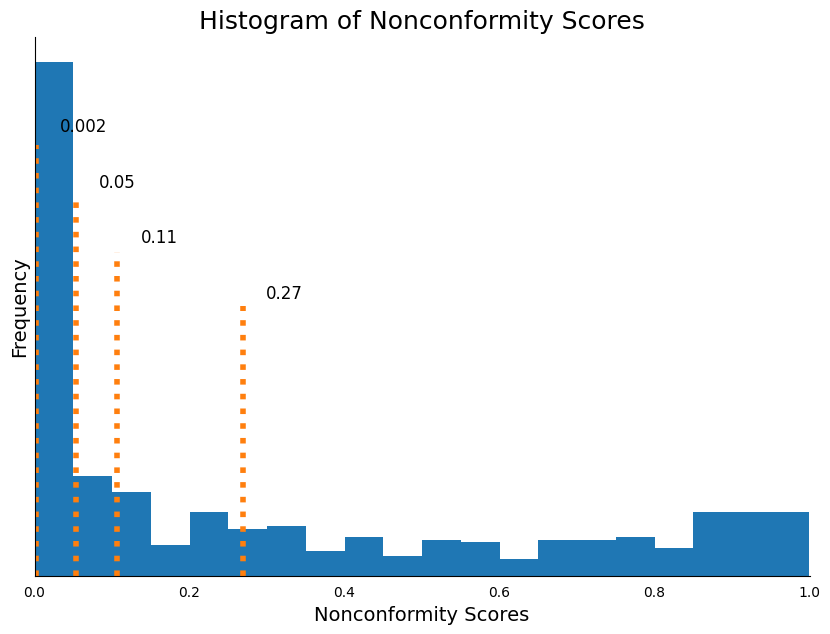

In [16]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(conformal_scores["calibrating_scores"], bins=20, alpha=1, label="Calibrating scores");
ax.set_xlabel("Nonconformity Scores", fontsize=14)
ax.set_yticks([])
ax.set_xlim(0, 1)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(left = False)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Histogram of Nonconformity Scores", fontsize=18)

quants = [[qhat[0], 1, 0.5], [qhat[1], 1, 0.6], [qhat[2], 1, 0.7],  [qhat[3], 1, 0.8]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color="tab:orange", linewidth=4)
    
ax.text(qhat[0]+.03, 100, f"{round(qhat[0], 2)}", size = 12)
ax.text(qhat[1]+.03, 120, f"{round(qhat[1], 2)}", size = 12)
ax.text(qhat[2]+.03, 140, f"{round(qhat[2], 2)}", size = 12)
ax.text(qhat[3]+.03, 160, f"{round(qhat[3], 3)}", size = 12)

plt.show()

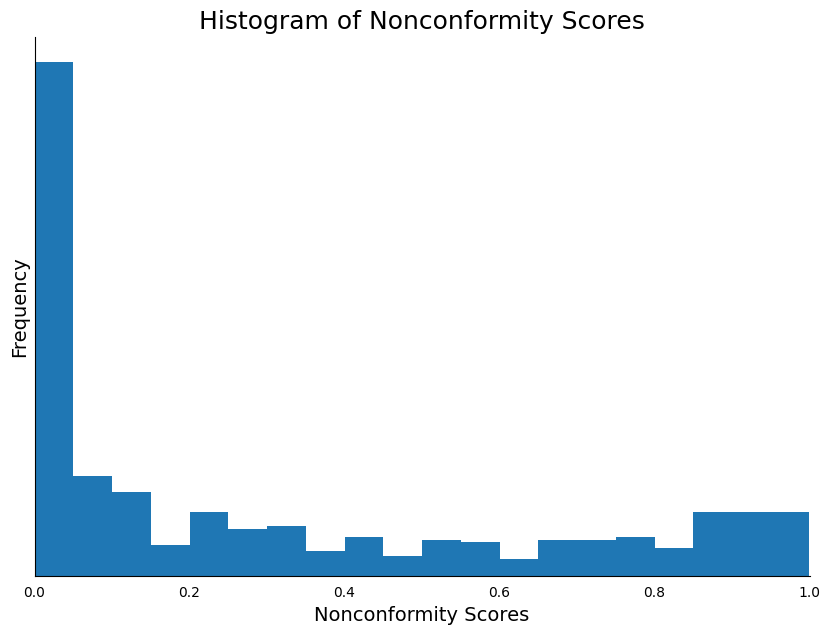

In [8]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(conformal_scores["calibrating_scores"], bins=20, alpha=1, label="Calibrating scores");
ax.set_xlabel("Nonconformity Scores", fontsize=14)
ax.set_yticks([])
ax.set_xlim(0, 1)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(left = False)
ax.tick_params(left = False, bottom = False)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Histogram of Nonconformity Scores", fontsize=18)


plt.show()

In [12]:
probs = pd.read_csv("probs.csv")
probs_max = probs.max(axis=1)

In [13]:
count = []
for q in qhat:
    count.append(sum(probs_max < q))

In [14]:
perc_count = (np.array(count) / 1500) * 100
cp_names = ["CP-0.2", "CP-0.1", "CP-0.05", "CP-0.01"]

In [16]:
perc_count

array([24.53333333, 45.4       , 58.13333333, 87.66666667])

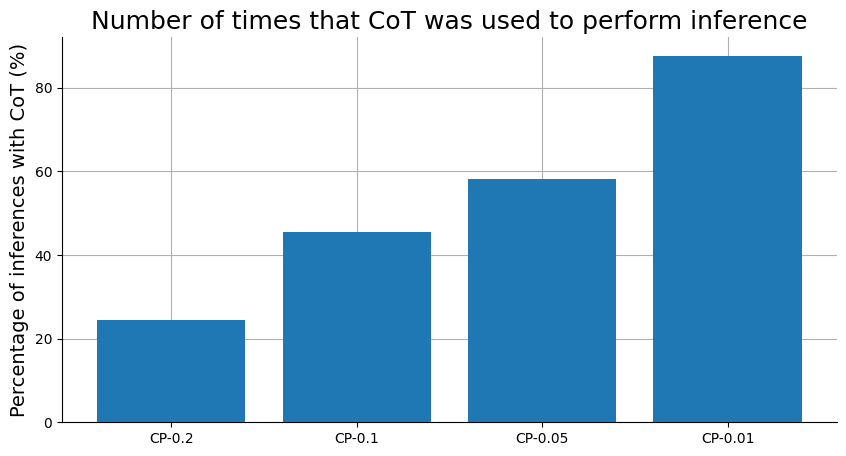

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(cp_names, perc_count, zorder=3)
ax.set_ylabel("Percentage of inferences with CoT (%)", fontsize=14)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title("Number of times that CoT was used to perform inference", fontsize=18);
ax.grid()

In [6]:
dist = np.random.gamma(2, 2, 500)
dist = dist/np.max(dist)

[]

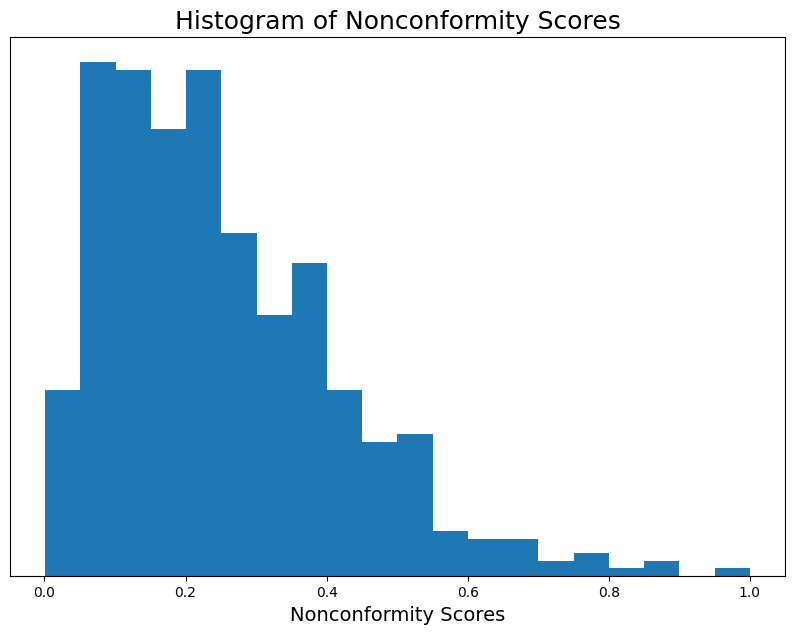

In [9]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(dist, bins=20, alpha=1, label="Calibrating scores");
ax.set_title("Histogram of Nonconformity Scores", fontsize=18)
ax.set_xlabel("Nonconformity Scores", fontsize=14)
ax.set_yticks([])

In [10]:
alpha = 0.1
N = 500
q = np.ceil((N+1)*(1-alpha))/N
qhat = np.quantile(dist, q)

In [11]:
qhat

0.4844304967470521

[]

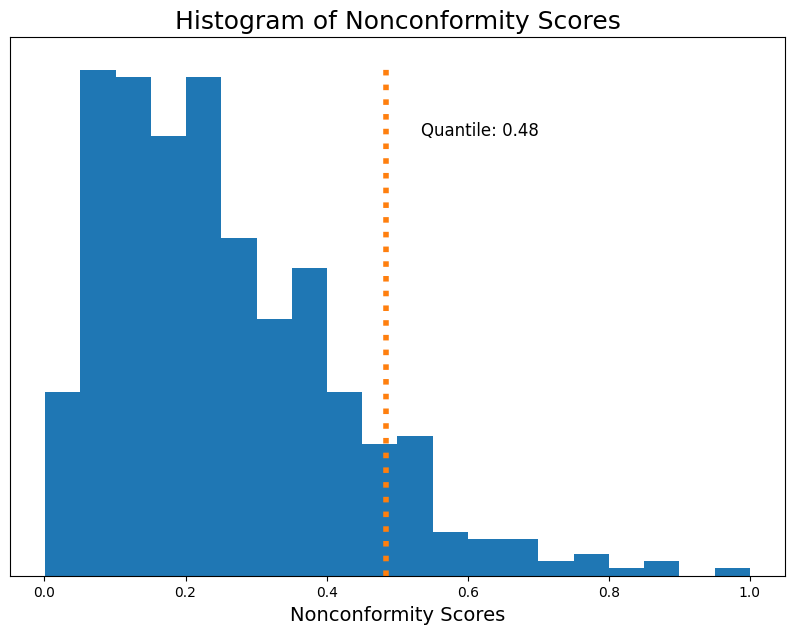

In [22]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(dist, bins=20, alpha=1, label="Calibrating scores");
ax.set_title("Histogram of Nonconformity Scores", fontsize=18)
ax.set_xlabel("Nonconformity Scores", fontsize=14)
ax.vlines(qhat, 0, 70, color="tab:orange", linestyle=":", label="Quantile", linewidth=4)
ax.annotate(f"Quantile: {round(qhat, 2)}", (qhat+0.05, 60), size=12)
ax.set_yticks([])